In [1]:
# General import, names of train, test, val
%load_ext autoreload
%autoreload 2
import numpy as np
import pysam
from tqdm.notebook import tqdm
import h5py
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=0)

basedir = '/data/leslie/sunge/'
aligndir = f'{basedir}f1_hybrid/EpiSC_ATAC_bam/'
ctype = 'EpiSC'
strain = 'molf'
b6_strain = 'b6_molf'
ident = ''     # ident is '' for you or whatever label you want to use for the h5 data you've generated

datadir = f'{basedir}f1_ASA/{strain}/{ctype}/data/'
chrom_train = [1,2,4,6,7,8,9,11,12,13,14,16,17,18,19]
chrom_val = [3,5]
chrom_test = [10,15]
chroms = [chrom_train, chrom_val, chrom_test]
name = ['train', 'val', 'test']

reps = ['r1','r2','r3','r4']
seqlen = 300                         # region around summit for sequence
seqlen1 = 150                        # region around summit for coverage
save = True                          # failsafe to prevent unwanted overwriting

In [38]:
def plot_peaks(peakfile):
    peaks = pd.read_csv(peakfile, sep='\t', header=None)
    print(peaks.shape)

    idr_thresh = 0.05
    idx = np.where(peaks.iloc[:, 11] >= -np.log10(idr_thresh))[0]
    sig_peaks = peaks.loc[idx].reset_index(drop=True)
    print(sig_peaks.shape)

    counts, bins = np.histogram(sig_peaks.loc[:, 11])
    plt.stairs(counts, bins)

(184889, 20)
(81905, 20)
(67123, 20)
(36099, 20)


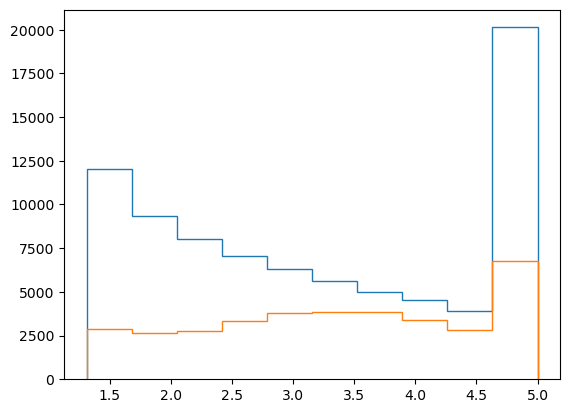

In [40]:
peakfile1 = f'{aligndir}b6_cast/peaks/peakatlas.bed'
peakfile2 = "/data/leslie/sunge/pseudodiploid/cd8/peaks/peakatlas.bed"

plot_peaks(peakfile1)
plot_peaks(peakfile2)